In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

In [39]:
def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [7]:
diabetes_df = pd.read_csv('./02_동영상 연습예제/3장/diabetes.csv')

In [8]:
print(diabetes_df['Outcome'].value_counts())
diabetes_df.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes_df.shape

(768, 9)

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [34]:
get_clf_eval(y_test,pred)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.798701, 정밀도: 0.767442, 재현율: 0.6111, F1:0.6804


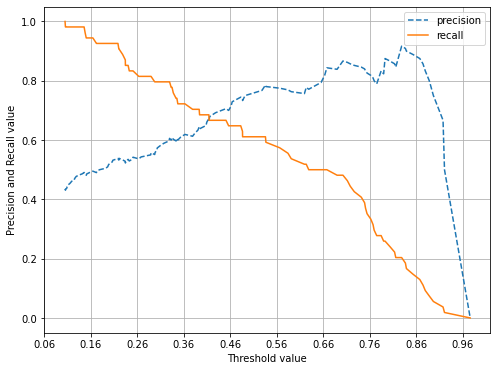

In [37]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [18]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

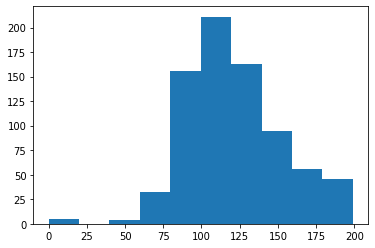

In [21]:
plt.hist(diabetes_df['Glucose'], bins=10)

In [22]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.651042 %
BloodPressure 0 건수는 35, 퍼센트는 4.557292 %
SkinThickness 0 건수는 227, 퍼센트는 29.557292 %
Insulin 0 건수는 374, 퍼센트는 48.697917 %
BMI 0 건수는 11, 퍼센트는 1.432292 %


In [24]:
mean_zero_features = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, mean_zero_features)

In [26]:
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [29]:
diabetes_df[zero_features].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [33]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.798701, 정밀도: 0.767442, 재현율: 0.6111, F1:0.6804


In [43]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.714286, 정밀도: 0.565789, 재현율: 0.7963, F1:0.6615
임곗값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.740260, 정밀도: 0.600000, 재현율: 0.7778, F1:0.6774
임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.746753, 정밀도: 0.619048, 재현율: 0.7222, F1:0.6667
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.753247, 정밀도: 0.633333, 재현율: 0.7037, F1:0.6667
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.779221, 정밀도: 0.692308, 재현율: 0.6667, F1:0.6792
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.785714, 정밀도: 0.705882, 재현율: 0.6667, F1:0.6857
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.798701, 정밀도: 0.744681, 재현율: 0.6481, F1:0.6931
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.798701, 정밀도: 0.767442, 재현율: 0.6111, F1:0.6804


In [45]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048)

오차행렬
[[88 12]
 [19 35]]
정확도: 0.798701, 정밀도: 0.744681, 재현율: 0.6481, F1:0.6931


In [46]:
pred_proba

array([[0.96438577, 0.03561423],
       [0.79931596, 0.20068404],
       [0.842334  , 0.157666  ],
       [0.43342396, 0.56657604],
       [0.58560336, 0.41439664],
       [0.24553171, 0.75446829],
       [0.16082739, 0.83917261],
       [0.84935166, 0.15064834],
       [0.80711452, 0.19288548],
       [0.89337231, 0.10662769],
       [0.33192872, 0.66807128],
       [0.60565216, 0.39434784],
       [0.95343873, 0.04656127],
       [0.60929763, 0.39070237],
       [0.73636931, 0.26363069],
       [0.90778932, 0.09221068],
       [0.20682478, 0.79317522],
       [0.91162757, 0.08837243],
       [0.4155357 , 0.5844643 ],
       [0.1963514 , 0.8036486 ],
       [0.58389103, 0.41610897],
       [0.65240945, 0.34759055],
       [0.93625519, 0.06374481],
       [0.68259271, 0.31740729],
       [0.70211813, 0.29788187],
       [0.89590376, 0.10409624],
       [0.07897121, 0.92102879],
       [0.25082215, 0.74917785],
       [0.82741521, 0.17258479],
       [0.11165251, 0.88834749],
       [0.

In [49]:
pred_proba[:,1].reshape(-1,1)

array([[0.03561423],
       [0.20068404],
       [0.157666  ],
       [0.56657604],
       [0.41439664],
       [0.75446829],
       [0.83917261],
       [0.15064834],
       [0.19288548],
       [0.10662769],
       [0.66807128],
       [0.39434784],
       [0.04656127],
       [0.39070237],
       [0.26363069],
       [0.09221068],
       [0.79317522],
       [0.08837243],
       [0.5844643 ],
       [0.8036486 ],
       [0.41610897],
       [0.34759055],
       [0.06374481],
       [0.31740729],
       [0.29788187],
       [0.10409624],
       [0.92102879],
       [0.74917785],
       [0.17258479],
       [0.88834749],
       [0.22884491],
       [0.23579979],
       [0.11190966],
       [0.15169081],
       [0.10217543],
       [0.74205389],
       [0.22076285],
       [0.20662792],
       [0.85291458],
       [0.6633152 ],
       [0.4099781 ],
       [0.23486812],
       [0.7026767 ],
       [0.12921675],
       [0.34381359],
       [0.0147951 ],
       [0.46453351],
       [0.087